In [1]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [18]:
import random 

random.seed(50)
x1 = random.sample(range(100), k=50)
x1 = np.array(x1)
x2 = random.sample(range(100), k=50)
x2 = np.array(x2)

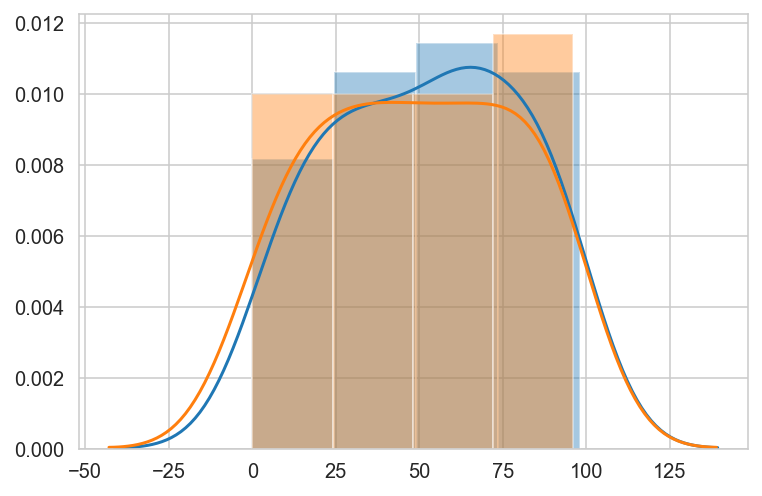

In [21]:
#Visually inspecting the distributions for differences in mean and standard deviation
sns.distplot(x1), sns.distplot(x2);

In [22]:
#Function for variance in each sample
def sample_variance(sample):
    var = np.var(sample)
    return var

In [25]:
#Finding each variance
sample_variance(x1), sample_variance(x2)

(790.7583999999999, 854.5296)

In [45]:
#Finding the critical T Value and P Value
def twosample_tstatistic(sample1, sample2):
    stat = stats.ttest_ind(sample1, sample2, equal_var = False)
    return stat

two_t = twosample_tstatistic(x1, x2)
print('T-Stat: ',two_t.statistic, ' P-Val: ',two_t.pvalue)

T-Stat:  0.4348881917666152  P-Val:  0.6646011936800353


In [43]:
#Check T-Test results
stats.ttest_ind(x1, x2)

Ttest_indResult(statistic=0.4348881917666152, pvalue=0.6645997593834008)